In [49]:
# Physics 111 Final Project: Variable-Length Pendulum
# December 17, 2023

from scipy.integrate import odeint
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
import math

# Relevant Parameters:
ω = 1       # Frequency of oscillations in length
g = 2       # Gravitational acceleration
l = 3       # Pendulum base length
α = 1       # Amplitude of oscillations in length
ω0 = np.sqrt(g / l)   # Frequency of small oscillations for simple pendulum (assuming no change in length)
f = ω / ω0            # Frequency ratio


In [50]:
# Derivatives function
def θ_derivatives(x, τ):
    """
    Arguments:  x – a list of the current values of θ and dθ/dτ.
                τ – dimensionless time at which to compute dθ/dτ and d^2θ/dτ^2.
    Returns:    A list containing dθ/dτ and d^2θ/dτ^2 at τ.
    """
    θ, dθdτ = x
    return [dθdτ, ((-2 * (α / l) * f * np.cos(f * τ) * dθdτ - np.sin(θ)) / (1 + (α / l) * np.sin(f * τ)))]

In [69]:
# Solving the Equation of Motion

# Define range of τ values spaced 0.01 units apart
time = np.linspace(0, 500, 50000)
timeneg = np.linspace(0, -5, 500)

# Define initial conditions (θ, dθdτ)
x0 = [0.5, 0]

# Solve the ODE on our positive τ-interval
Pposition, Pvelocity = odeint(θ_derivatives, x0, time).T


# For negative direction, go the opposite way with time
Nposition, Nvelocity = odeint(θ_derivatives, x0, timeneg).T

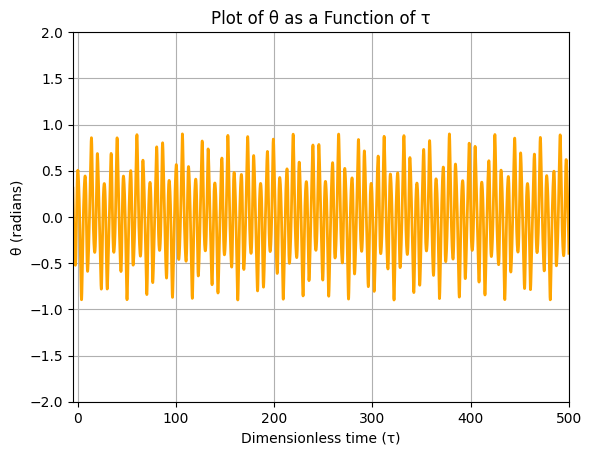

In [70]:
# PLOT OF θ

# Plot θ vs τ
plt.plot(time, Pposition, 'orange', linewidth = 2)
plt.plot(timeneg, Nposition, 'orange', linewidth = 2)

# Add plot labels
plt.xlabel('Dimensionless time (τ)')
plt.ylabel('θ (radians)')
plt.title("Plot of θ as a Function of τ")
plt.ticklabel_format(style='sci', axis='x')

# Change range of data
plt.axis((-5, 500, -2, 2))
plt.grid(True)

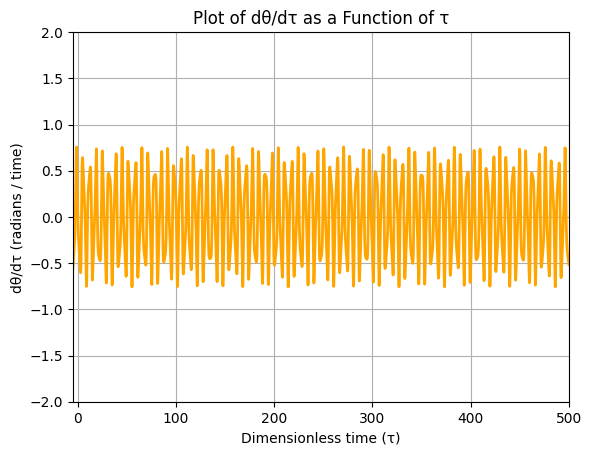

In [71]:
# PLOT OF dθdτ

# Plot θdot vs τ
plt.plot(time, Pvelocity, 'orange', linewidth = 2)
plt.plot(timeneg, Nvelocity, 'orange', linewidth = 2)

# Add plot labels
plt.xlabel('Dimensionless time (τ)')
plt.ylabel('dθ/dτ (radians / time)')
plt.title("Plot of dθ/dτ as a Function of τ")
plt.ticklabel_format(style='sci', axis='x')

# Change range of data
plt.axis((-5, 500, -2, 2))
plt.grid(True)


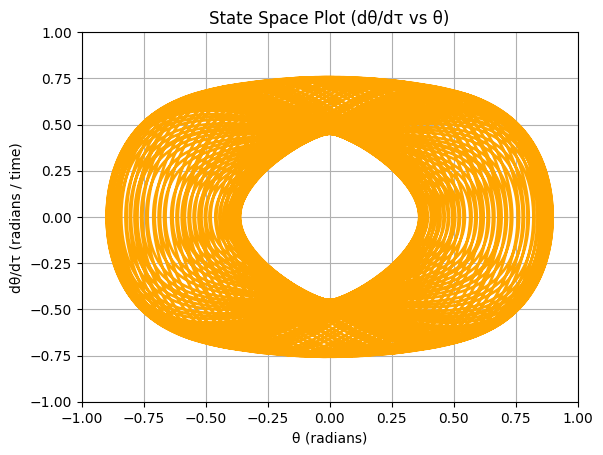

In [72]:
# STATE SPACE PLOT

# Plot dθdτ vs θ
plt.plot(Pposition, Pvelocity, 'orange', linewidth = 2)
plt.plot(Nposition, Nvelocity, 'orange', linewidth = 2)

# Add plot labels
plt.xlabel('θ (radians)')
plt.ylabel('dθ/dτ (radians / time)')
plt.title("State Space Plot (dθ/dτ vs θ)")
plt.ticklabel_format(style='sci', axis='x')

# Change range of data
plt.axis((-1, 1, -1, 1))
plt.grid(True)